# Курсовой проект № 1 по теме "Алгоритмы анализа данных"

Ссылка на kaggle: https://www.kaggle.com/c/tutors-expected-math-exam-results

### Подключение библиотек и скриптов

In [1]:
%matplotlib inline

import import_ipynb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

from Lesson_4_mytree import DecisionTree
from Lesson_5_forest import RandomForest

importing Jupyter notebook from Lesson_4_mytree.ipynb
importing Jupyter notebook from Lesson_5_forest.ipynb


In [2]:
def r2_score(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    
    return 1 - ((y_pred - y)**2).sum() / ((y - y.mean())**2).sum()

In [3]:
def cross_val_score(model, X, y, folds):
    
    # Число объектов в фолде:
    n = X.shape[0] // folds
    
    scores = []
    
    for i in range(folds):
        idx = np.arange(i*n, (i+1)*n)
        
        X_test = X.iloc[idx, :]
        y_test = y.iloc[idx]
        X_train = X[~X.isin(X_test)].dropna()
        y_train = y[~y.index.isin(y_test.index)]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        score = r2_score(y_pred, y_test)
        scores.append(score)
        
    return scores

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2_score(train_true_values, train_pred_values), 4)))
    print("Test R2:\t" + str(round(r2_score(test_true_values, test_pred_values), 4)))
    
    plt.figure(figsize=(10,5))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

### Пути к директориям и файлам

In [5]:
TRAIN_DATASET_PATH = './train.csv'
TEST_DATASET_PATH = './test.csv'

## Загрузка данных <a class='anchor' id='loads'>

In [6]:
df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
df.head()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
Id,,,,,,,,,,,
0,40.0,0.0,1400.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,63.0
1,48.0,4.0,2850.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,86.0
2,39.0,0.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
3,46.0,5.0,1400.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
4,43.0,1.0,1500.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


## Обучим базовую модель

In [7]:
df.isna().sum()

age                    0
years_of_experience    0
lesson_price           0
qualification          0
physics                0
chemistry              0
biology                0
english                0
geography              0
history                0
mean_exam_points       0
dtype: int64

Пропусков нет, обучим модель дерева решений:

In [8]:
X = df.drop('mean_exam_points', axis=1)
y = df['mean_exam_points']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

In [10]:
model = DecisionTree(criterion='regression')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)

Train R2:	0.7043
Test R2:	0.6946


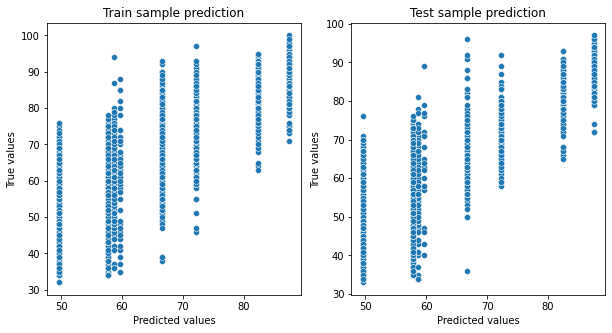

In [11]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred)

## EDA <a class='anchor' id='edas'>

In [12]:
df.describe()

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45.878000,1.986800,1699.105000,1.719500,0.375000,0.132900,0.109600,0.053700,0.032100,0.019400,64.340800
std,8.043929,1.772213,524.886654,0.792264,0.484147,0.339484,0.312406,0.225436,0.176274,0.137933,13.536823
min,23.000000,0.000000,200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,40.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,46.000000,2.000000,1500.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,68.000000,10.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000


Пропусков нет, явных выбросов не видно.

In [13]:
df.dtypes

age                    float64
years_of_experience    float64
lesson_price           float64
qualification          float64
physics                float64
chemistry              float64
biology                float64
english                float64
geography              float64
history                float64
mean_exam_points       float64
dtype: object

In [14]:
TARGET_NAME = 'mean_exam_points'

NUM_FEATURE_NAMES = ['age', 'lesson_price']
BINARY_FEATURE_NAMES = ['physics', 'chemistry', 'biology', 'english', 'geography', 'history']

#### Целевая переменная

In [15]:
plt.rcParams.update({'font.size': 14})

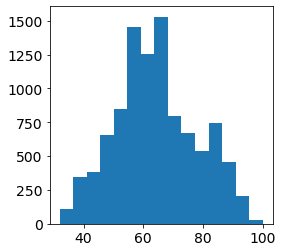

In [16]:
df[TARGET_NAME].hist(figsize=(4, 4), bins=15, grid=False);

#### Количественные переменные

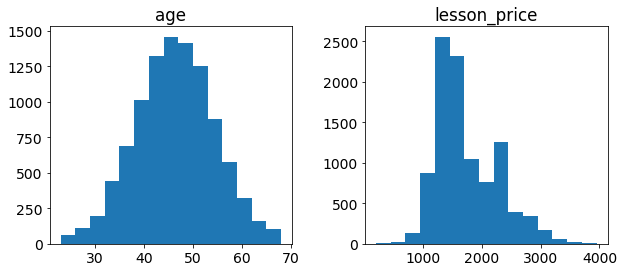

In [17]:
df[NUM_FEATURE_NAMES].hist(figsize=(10, 4), bins=15, grid=False);

Судя по распределениям, выбросов нет.

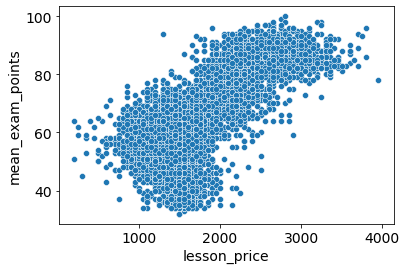

In [18]:
sns.scatterplot(x='lesson_price', y=TARGET_NAME, data=df);

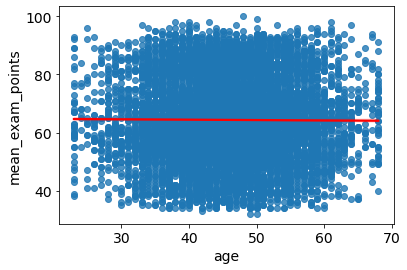

In [19]:
sns.regplot(x='age', y=TARGET_NAME, data=df, line_kws={'color': 'red'});

*Age* не оказывает видимого влияния на целевую переменную, этот признак будет удалён.

#### Категориальные переменные

In [20]:
df['years_of_experience'].value_counts()

0.0     2785
2.0     1804
1.0     1757
3.0     1572
4.0     1122
5.0      584
6.0      282
7.0       70
8.0       20
9.0        3
10.0       1
Name: years_of_experience, dtype: int64

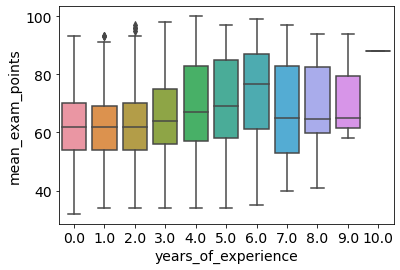

In [21]:
sns.boxplot(x='years_of_experience', y=TARGET_NAME, data=df);

Так как менее 1% выборки содержат значения признака *years_of_experience* больше 6 и    
они не вписываются в тенденцию на графике выше, будем считать их непрезентативными     
и приравняем их к значению 6.

In [22]:
df['qualification'].value_counts()

1.0    4884
2.0    3087
3.0    1979
4.0      50
Name: qualification, dtype: int64

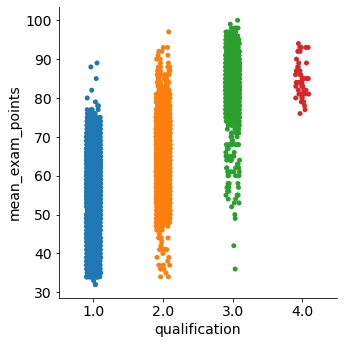

In [23]:
sns.catplot(x='qualification', y=TARGET_NAME, data=df);

In [24]:
for feature in BINARY_FEATURE_NAMES:
    print(df[feature].value_counts())

0.0    6250
1.0    3750
Name: physics, dtype: int64
0.0    8671
1.0    1329
Name: chemistry, dtype: int64
0.0    8904
1.0    1096
Name: biology, dtype: int64
0.0    9463
1.0     537
Name: english, dtype: int64
0.0    9679
1.0     321
Name: geography, dtype: int64
0.0    9806
1.0     194
Name: history, dtype: int64


In [25]:
Z = df.copy()

In [26]:
Z['subject'] = 'None'
Z.loc[Z['physics'] == 1, 'subject'] = 'Physics'
Z.loc[Z['chemistry'] == 1, 'subject'] ='Chemistry'
Z.loc[Z['biology'] == 1, 'subject'] = 'Biology'
Z.loc[Z['english'] == 1, 'subject'] = 'English'
Z.loc[Z['geography'] == 1, 'subject'] = 'Geography'
Z.loc[Z['history'] == 1, 'subject'] = 'History'

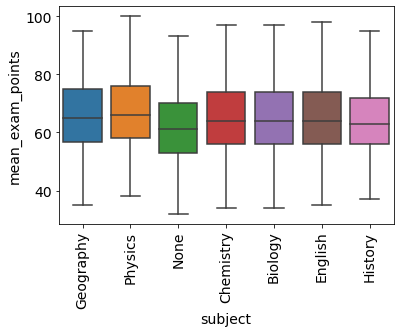

In [27]:
sns.boxplot(x='subject', y=TARGET_NAME, data=Z).set_xticklabels(Z['subject'].unique(), rotation=90);

Эти признаки будут объединены в один и разбиты по категориям  
в зависимости от влияния на целевую переменную.  
Также в датасете есть 1426 репетиторов, которые преподают  
более, чем один предмет. Различные попытки обработать эти объекты   
не привели к улучшению метрики модели, поэтому они будут причислены  
к категориям одиночных предметов.

In [28]:
Z.loc[Z[BINARY_FEATURE_NAMES].sum(axis=1) >= 2].shape[0]

1426

## Построение новых признаков <a class='anchor' id='features'>

In [29]:
class FeatureGenerator:
    
    def transform(self, X):

        X.loc[X['years_of_experience'] > 6, 'years_of_experience'] = 6
        X['subject'] = 0
        X.loc[X['history'] == 1, 'subject'] = 1
        X.loc[X['english'] == 1, 'subject'] = 1
        X.loc[X['chemistry'] == 1, 'subject'] = 1
        X.loc[X['biology'] == 1, 'subject'] = 1
        X.loc[X['geography'] == 1, 'subject'] = 2
        X.loc[X['physics'] == 1, 'subject'] = 3
        X.drop(['physics', 'chemistry', 'biology', 'english', 'geography', 'history', 'age'], axis=1, inplace=True)
        
        return X

## Разбиение на train и test <a class='anchor' id='splits'>

In [30]:
X = df.drop(TARGET_NAME, axis=1)
y = df[TARGET_NAME]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=29)

In [32]:
feature_gen = FeatureGenerator()

X_train = feature_gen.transform(X_train)
X_test = feature_gen.transform(X_test)

X_train.shape, X_test.shape

((7500, 4), (2500, 4))

## Построение модели <a class='anchor' id='models'>

#### Обучение

In [33]:
model_rf = RandomForest(n_trees=20, criterion='regression', min_leaf=5, random_state=29, n_features='squared')
model_rf.fit(X_train, y_train)

#### Оценка финальной модели

In [34]:
y_pred_train = model_rf.predict(X_train)
y_pred_test = model_rf.predict(X_test)

Train R2:	0.8039
Test R2:	0.7742


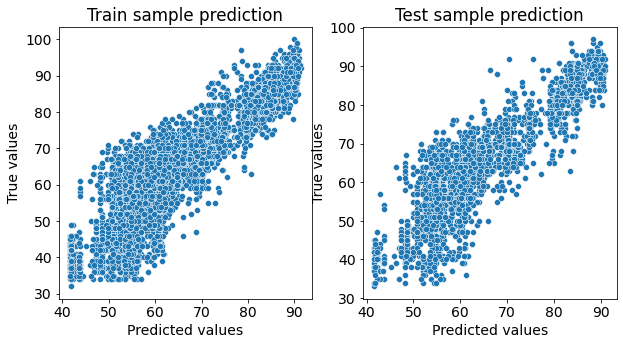

In [35]:
evaluate_preds(y_train, y_pred_train, y_test, y_pred_test)

In [36]:
score = cross_val_score(model_rf, X_train, y_train, folds=3)
print(score)
print(round(np.mean(score), 4))

[0.688057403747133, 0.7250390389584346, 0.7114572090796151]
0.7082


## Прогнозирование на тестовом датасете <a class='anchor' id='prediction'>

In [37]:
df_test = pd.read_csv('./test.csv', index_col='Id')
df_test = feature_gen.transform(df_test)

In [38]:
sample_pred = pd.read_csv('./submission_example.csv', index_col='Id')

In [39]:
predictions = model_rf.predict(df_test)

In [40]:
sample_pred[TARGET_NAME] = predictions

In [41]:
sample_pred.to_csv('./mrozov_prediction.csv')